<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime as dt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', parse_dates=['first_day_exposition'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [3]:
pd.options.display.max_columns = 50

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [1]:
data = data.rename(columns={"cityCenters_nearest": "city_centers_nearest"})

NameError: name 'data' is not defined

### Вывод

Получили датасет с 23699 строками, 22 столбцами, разделитель \t.

## Предобработка данных

In [6]:
def nan_values(df):
    count_missing = df.isna().sum()
    percentage_missing = round(df.isna().sum() * 100 / len(data), 2)
    
    missing_value_df = pd.DataFrame({'num_missing': count_missing,
                                    'percententage_missing': percentage_missing})
    return missing_value_df


In [7]:
nan_values(data)

,num_missing,percententage_missing
total_images,0,0.00
last_price,0,0.00
total_area,0,0.00
first_day_exposition,0,0.00
rooms,0,0.00
ceiling_height,9195,38.80
floors_total,86,0.36
living_area,1903,8.03
floor,0,0.00
is_apartment,20924,88.29


In [8]:
data.drop_duplicates().reset_index(drop=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
data['balcony'] = data['balcony'].fillna(0).astype(int)

In [10]:
data['is_apartment'].unique()
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)

In [11]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,NaN,NaN,30.80,4,False,False,False,12.00,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23,1,NaN,NaN,20.75,1,False,False,False,NaN,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01,2,NaN,NaN,38.40,12,False,False,False,10.63,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06,3,NaN,NaN,47.10,8,False,False,False,16.80,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22,1,NaN,NaN,NaN,9,False,False,False,NaN,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.8,NaN,NaN,3,False,False,False,NaN,0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02,2,NaN,NaN,31.70,20,False,False,False,14.40,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20,3,NaN,NaN,45.38,6,False,False,False,23.42,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25,3,NaN,NaN,50.40,18,False,False,False,23.60,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


## Расчёты и добавление результатов в таблицу

In [12]:
def floor_category(df):
    floor = df['floor']
    floors_total = df['floors_total']
    floor_category = 'другой'
    if floor == 1:
        floor_category = 'первый'
    if floor == floors_total:
        floor_category = 'последний'
    return floor_category

#col = 'floor'
#conditions = [df[col] == 1,
#              df[col] >= data['floors_total']]
#choices = ['первый', 'последний']
#data['floor_category'] = np.select(conditions, choices, default='другой')
        
data['floor_category'] = data.apply(floor_category, axis=1)
data['living_total_area'] = data['living_area'] / data['total_area']
data['kitchen_total_area'] = data['kitchen_area'] / data['total_area']
data['price_per_sqm'] = data['last_price'] / data['total_area']
data['day_of_the_week'] = data['first_day_exposition'].dt.dayofweek
data['month'] = data['first_day_exposition'].dt.dayofweek
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_category,living_total_area,kitchen_total_area,price_per_sqm,day_of_the_week,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,другой,0.472222,0.231481,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,первый,0.460396,0.272277,82920.792079,1,1,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,другой,0.612500,0.148214,92785.714286,3,3,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,другой,NaN,NaN,408176.100629,4,4,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,другой,0.320000,0.410000,100000.000000,1,1,2018


<AxesSubplot:>

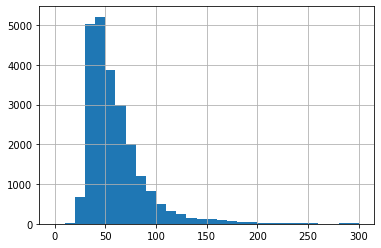

In [15]:
data['total_area'].hist(range=(0,300), bins=30)

<AxesSubplot:>

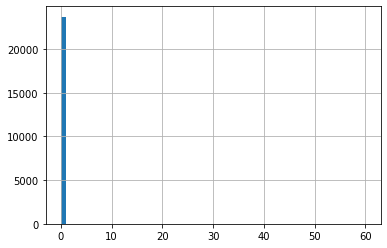

In [16]:
data['last_price'] = data['last_price'] / 1000000
data['last_price'].hist(range=(0, 60), bins=60)
#перевели цену в млн

<AxesSubplot:>

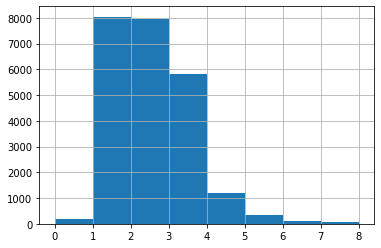

In [17]:
data['rooms'].hist(range=(0,8), bins=8)
#какой то странный провал между

<AxesSubplot:>

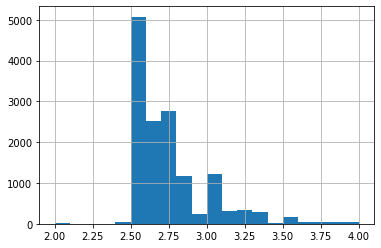

In [18]:
data['ceiling_height'].hist(range=(2,4), bins=20)

<AxesSubplot:>

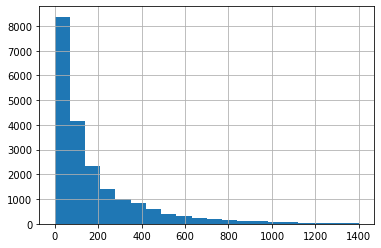

In [19]:
data['days_exposition'].hist(bins=20, range=(0,1400))

Text(0, 0.5, 'Количество объявлений')

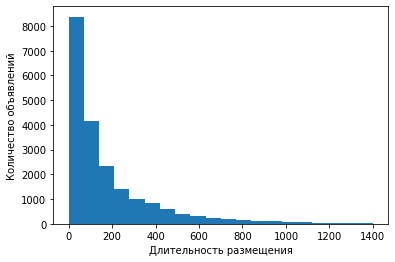

In [18]:
plt.hist(data['days_exposition'], bins=20, range=(0,1400), label='Длительность размещения')
plt.xlabel("Длительность размещения")
plt.ylabel('Количество объявлений')

In [19]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [20]:
data['days_exposition'].median()

95.0

In [21]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_category,living_total_area,kitchen_total_area,price_per_sqm,day_of_the_week,month,year
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,другой,0.472222,0.231481,120370.370370,3,3,2019
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,первый,0.460396,0.272277,82920.792079,1,1,2018
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,другой,0.612500,0.148214,92785.714286,3,3,2015
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,другой,NaN,NaN,408176.100629,4,4,2015
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,другой,0.320000,0.410000,100000.000000,1,1,2018


In [ ]:
#select_data = data.query('(last_price <= 20) & (2.2 <= ceiling_height <= 4) & (total_area <= 200)').head()
#select_data = data[data['last_price'] <= 20]
#select_data = select_data[select_data['ceiling_height'] >= 2.2]
#select_data = select_data[select_data['ceiling_height'] <=4]
#select_data = select_data[select_data['total_area'] <= 200]

condition = ((data['last_price'] <= 20) & 
            (data['ceiling_height'] >= 2.2) & 
            (data['ceiling_height'] <= 4) & 
            (data['total_area'] <= 200))

data[condition]

In [69]:
print('Весь датасет')
display(data['days_exposition'].describe())
print('Только квартир дешевле 20 млн, потолки от 2.2 до 4х метров и общая площадь до 200.')
display(data[condition]['days_exposition'].describe())
print('Все квартиры кроме предыдущих')
data[~condition]['days_exposition'].describe()

Весь датасет


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Только квартир дешевле 20 млн, потолки от 2.2 до 4х метров и общая площадь до 200.


count    11636.000000
mean       186.733585
std        225.272349
min          1.000000
25%         45.000000
50%        101.000000
75%        240.000000
max       1580.000000
Name: days_exposition, dtype: float64

Все квартиры кроме предыдущих


count    8882.000000
mean      173.231367
std       212.014360
min         2.000000
25%        45.000000
50%        90.000000
75%       219.000000
max      1572.000000
Name: days_exposition, dtype: float64

"Обычные" квартиры продаются дольше необычных квартир!

## Исследовательский анализ данных

Какие факторы больше всего влияют на стоимость квартиры?

In [59]:
research_data = data[['last_price', 'total_area', 'rooms', 'balcony', 'floor_category', 
                      'city_centers_nearest', 'day_of_the_week', 'year', 'month']]
research_data.describe()
research_data.corr().style.background_gradient()

,last_price,total_area,rooms,balcony,city_centers_nearest,day_of_the_week,year,month
last_price,1.000000,0.653675,0.363343,0.008559,-0.206747,0.001550,-0.043089,0.001550
total_area,0.653675,1.000000,0.758344,0.009941,-0.231446,-0.004695,-0.079912,-0.004695
rooms,0.363343,0.758344,1.000000,-0.015519,-0.184864,-0.004134,-0.055418,-0.004134
balcony,0.008559,0.009941,-0.015519,1.000000,0.065050,-0.001496,0.004570,-0.001496
city_centers_nearest,-0.206747,-0.231446,-0.184864,0.065050,1.000000,0.008883,0.032333,0.008883
day_of_the_week,0.001550,-0.004695,-0.004134,-0.001496,0.008883,1.000000,-0.004799,1.000000
year,-0.043089,-0.079912,-0.055418,0.004570,0.032333,-0.004799,1.000000,-0.004799
month,0.001550,-0.004695,-0.004134,-0.001496,0.008883,1.000000,-0.004799,1.000000


In [ ]:
research_data.corr()

Метраж влияет на цену, квартиры, но коэффициент корреляции 0.65 указывает, что существует еще много факторов которые участвуют в ценоообразовнии. Мы видим, что комнаты сильно коррелируют с общей площадью, но посредственно коррелируют с ценой. Есть небольшая отрицательная корреляция между удалением от центра города и ценой. Балконы, день недели и месяц почти не влияют на стоимость квартиры. В период с 2014 по 2019 стоимость квартир снижалась, об этом свидетельствует отрицательная корреляция между годом подачи объявления и ценой.

In [ ]:
top_towns = ['Санкт-Петербург',
             'посёлок Мурино',
             'посёлок Шушары',
             'Всеволожск',
             'Пушкин',
             'Колпино',
             'посёлок Парголово',
             'Гатчина',
             'деревня Кудрово',
             'Выборг']

for i in top_towns:
    median = data[data['locality_name'] == i]['last_price'].median()
    print(i, median)
    

In [ ]:
data['distance_km'] = data['city_centers_nearest'] / 1000
data['distance_km'] = data['distance_km'].round()
median_km = data.groupby('distance_km')['last_price'].median()
median_km.hist(range=(0,10), bins=100)

Самая дорогая стоимость кв. метра в Санкт-Петербурге, самая дешевая - в Выборге. Стоимость резко падает после 5го км, следовательно это и есть граница центра.

In [ ]:
spb_center = data.query('(city_centers_nearest <= 5000) &(locality_name == "Санкт-Петербург")')
spb_center[['total_area','last_price','rooms','ceiling_height']].describe()

Метраж влияет гораздо меньше на стоимость в центре санкт-Петербурга, чем в целом по датасету, квартиры в центре медленнее теряли в цене чем квартиры на окраине. Балконы влияют на стоимость квартиры в центре гораздо сильнее, чем в целом по датасету(0.11 против 0.008), возможно это связано с маленькой выборкой квартир в центре, или другими особенностями недвижимости - например коммуналки в центре могут быть без балконов, а дореволюционные дома - с балконами, и стоимость этих видов недвижимости будет сильно различаться. Также, на цену квартир в центре, значительное влияние оказывает месяц подачи объявления.

## Общий вывод

Главный предиктор цены квартиры - метраж. В то же время, он коррелирует только на 65% в общем датасете и на 55% в выборке по квартирам в центре. Все остальные параметры влияют очень слабо на цену квартиры.